In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('bodyfat.csv')
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


distribution plots for Density features is shown 


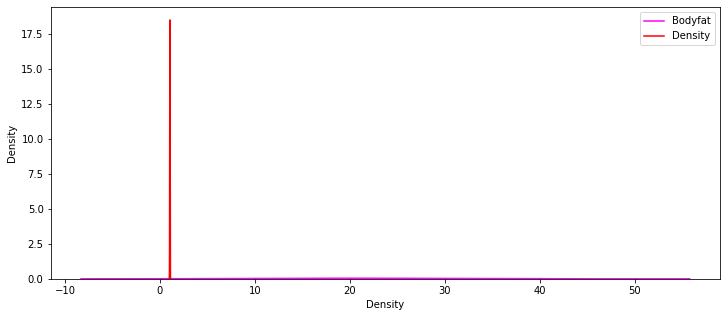

----------------------------------------------------------------------------------------------------
distribution plots for BodyFat features is shown 


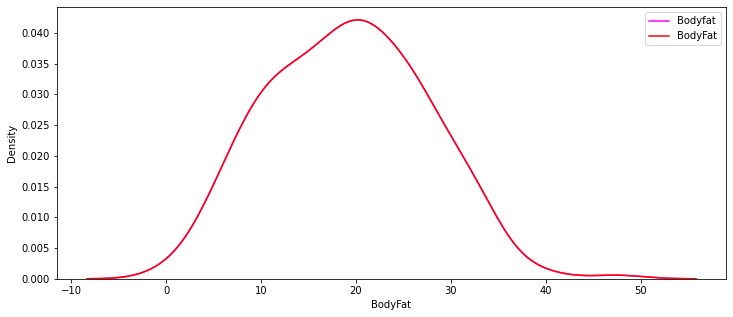

----------------------------------------------------------------------------------------------------
distribution plots for Age features is shown 


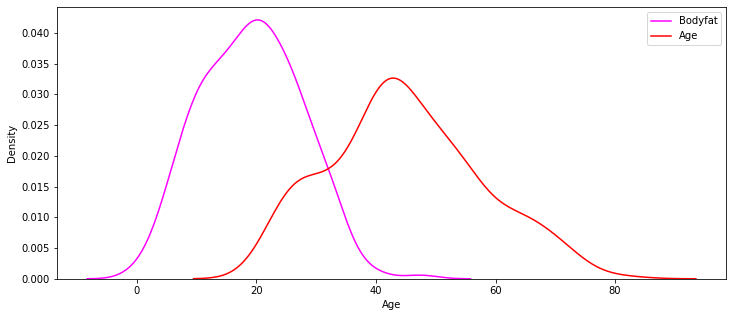

----------------------------------------------------------------------------------------------------
distribution plots for Weight features is shown 


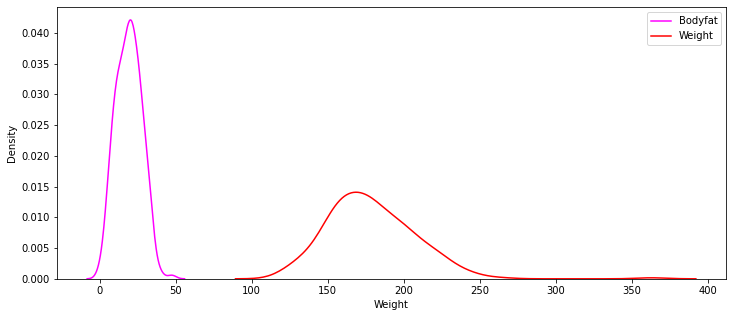

----------------------------------------------------------------------------------------------------
distribution plots for Height features is shown 


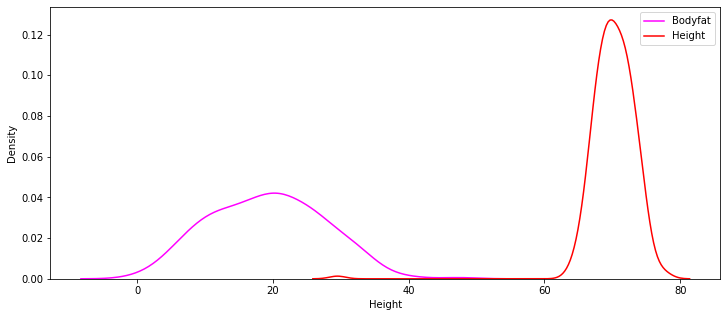

----------------------------------------------------------------------------------------------------
distribution plots for Neck features is shown 


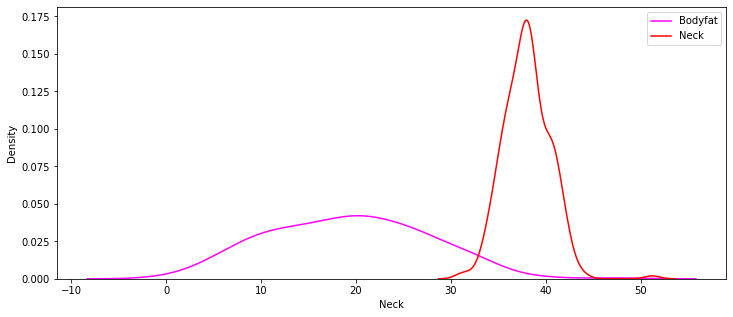

----------------------------------------------------------------------------------------------------
distribution plots for Chest features is shown 


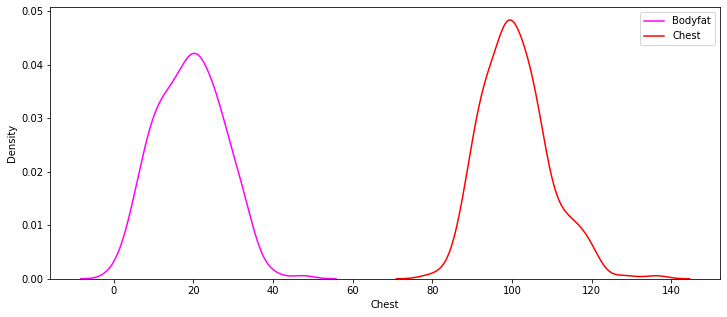

----------------------------------------------------------------------------------------------------
distribution plots for Abdomen features is shown 


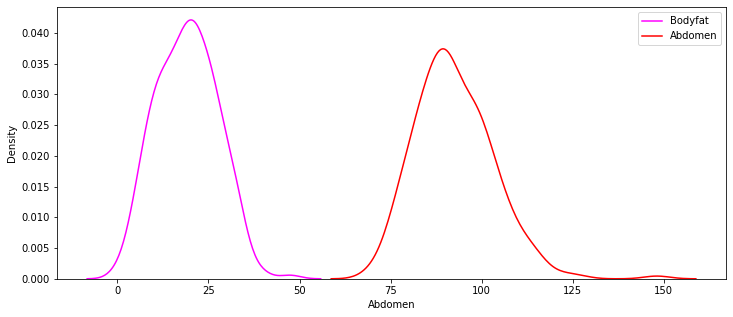

----------------------------------------------------------------------------------------------------
distribution plots for Hip features is shown 


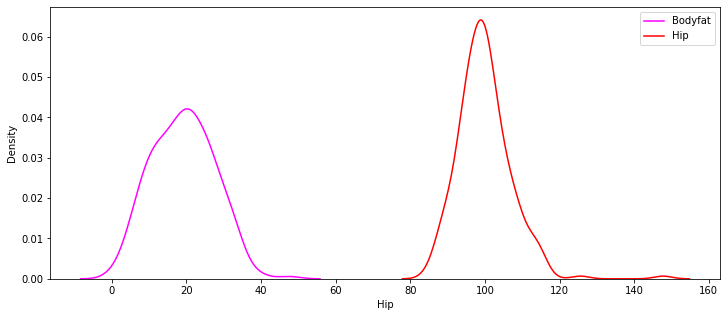

----------------------------------------------------------------------------------------------------
distribution plots for Thigh features is shown 


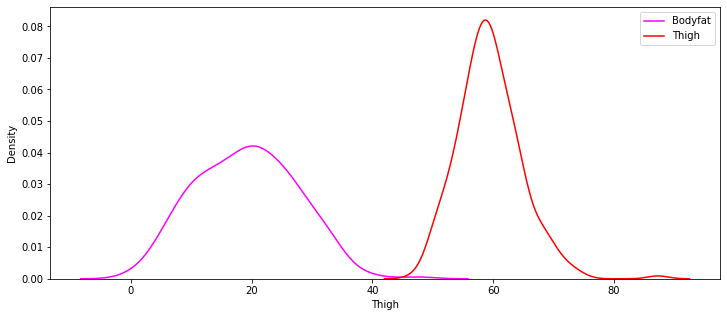

----------------------------------------------------------------------------------------------------
distribution plots for Knee features is shown 


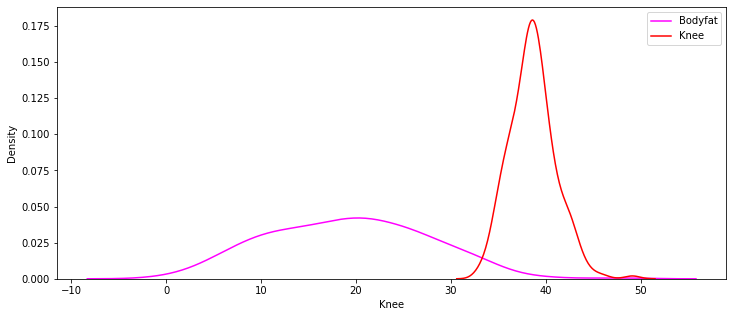

----------------------------------------------------------------------------------------------------
distribution plots for Ankle features is shown 


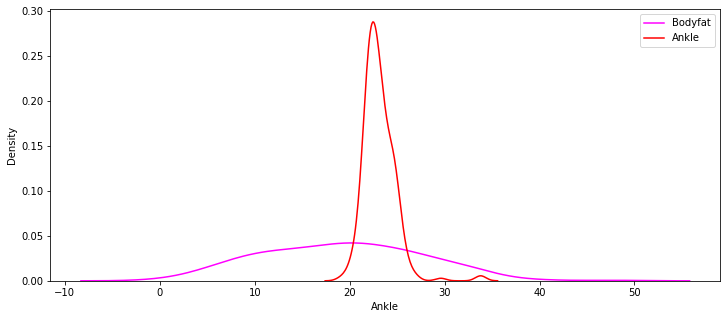

----------------------------------------------------------------------------------------------------
distribution plots for Biceps features is shown 


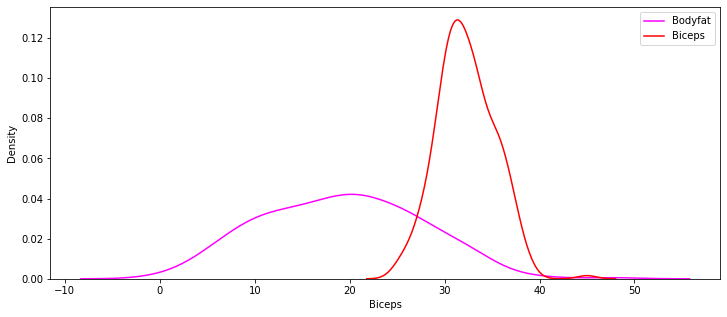

----------------------------------------------------------------------------------------------------
distribution plots for Forearm features is shown 


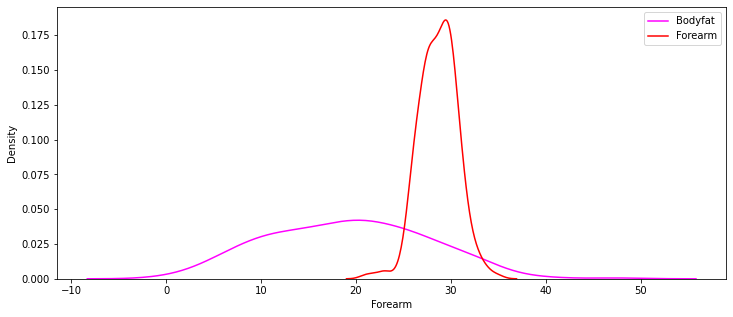

----------------------------------------------------------------------------------------------------
distribution plots for Wrist features is shown 


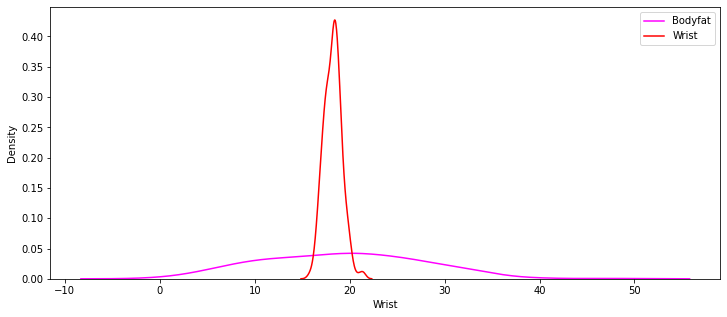

----------------------------------------------------------------------------------------------------


In [4]:
def plotdistplots(col):
    plt.figure(figsize=(12,5))
    sn.distplot(df['BodyFat'], color = 'magenta', hist = False, label = 'Bodyfat') # dependant feature
    sn.distplot(df[col], color = 'red', hist = False, label = col) # independant features`
    plt.legend()
    plt.show()
    
cols = list(df.columns) # convert index into list
for i in cols:
    print(f'distribution plots for {i} features is shown ')
    plotdistplots(i)
    print("-"*100)

### Distribution analysis
Which distritibution the variable belongs to

In [5]:
import scipy.stats as stats

Distribution plots for the features Density as show:


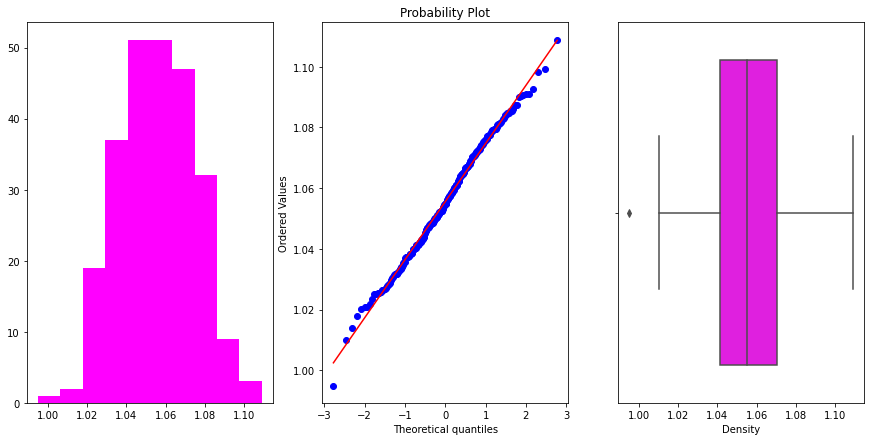

Distribution plots for the features BodyFat as show:


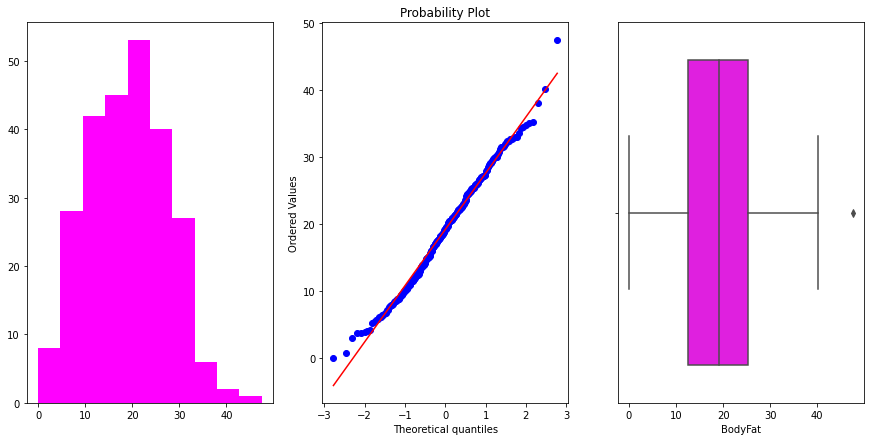

Distribution plots for the features Age as show:


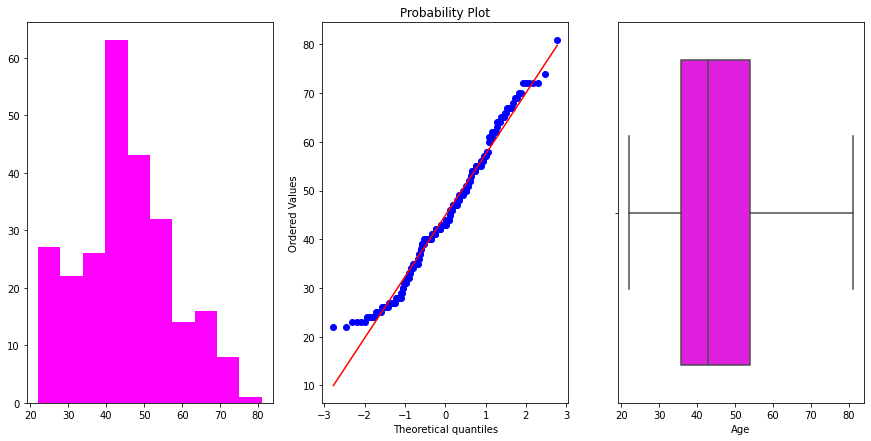

Distribution plots for the features Weight as show:


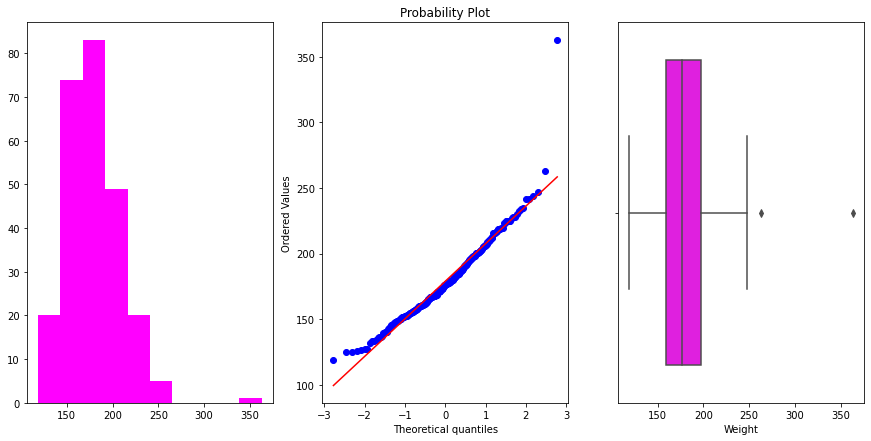

Distribution plots for the features Height as show:


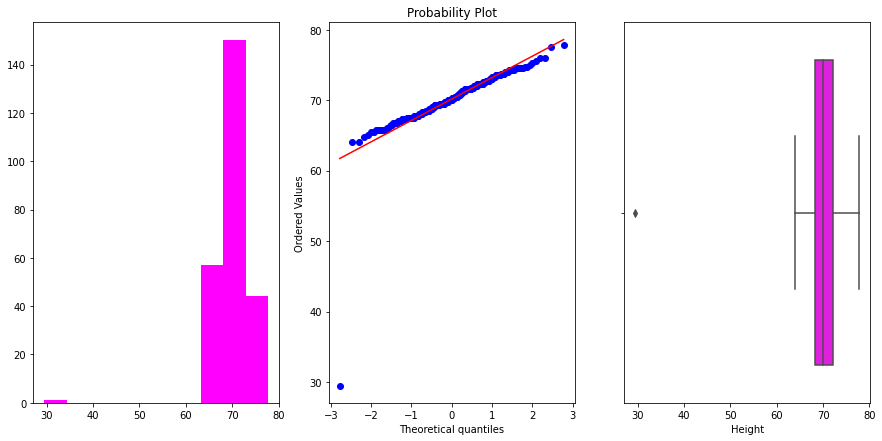

Distribution plots for the features Neck as show:


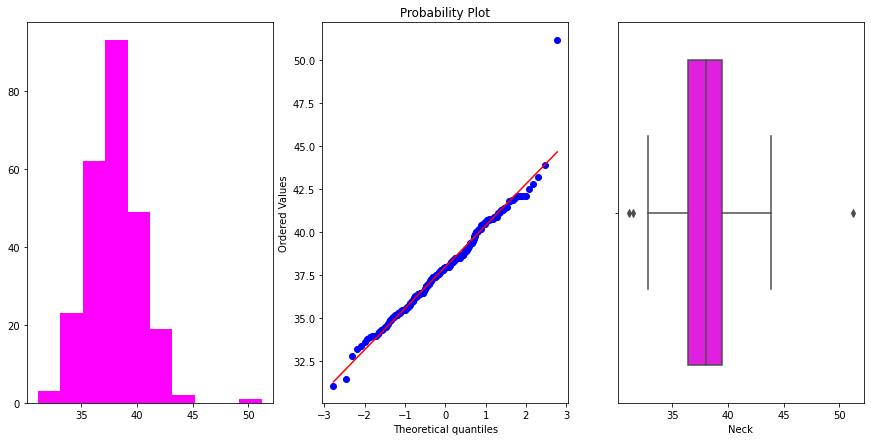

Distribution plots for the features Chest as show:


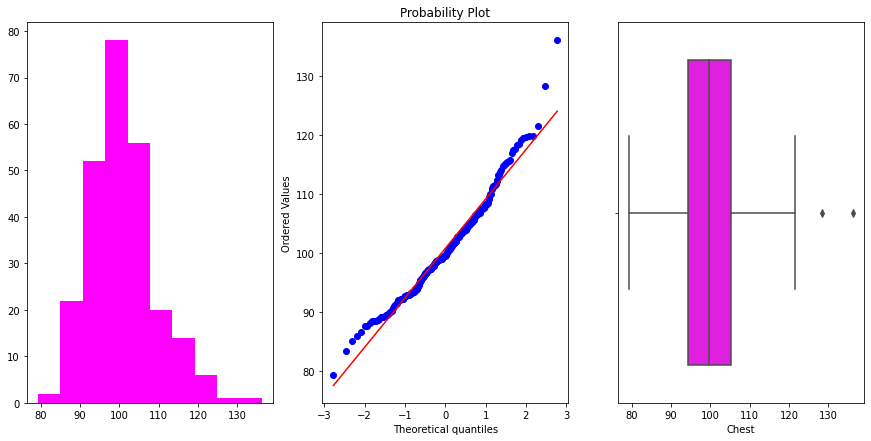

Distribution plots for the features Abdomen as show:


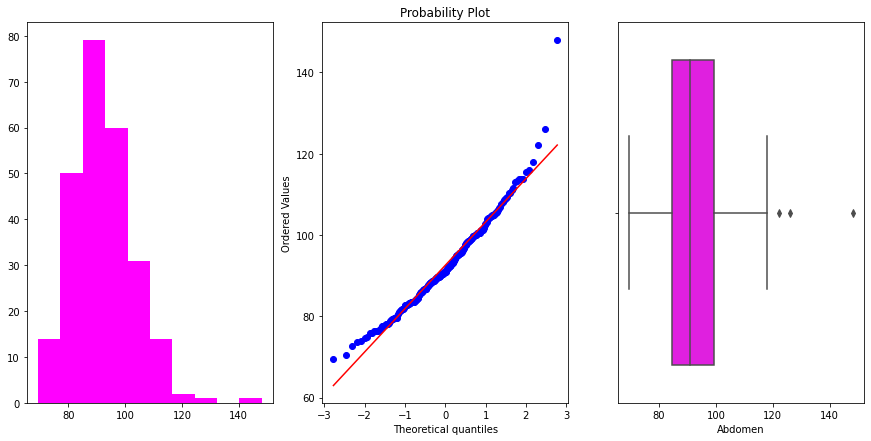

Distribution plots for the features Hip as show:


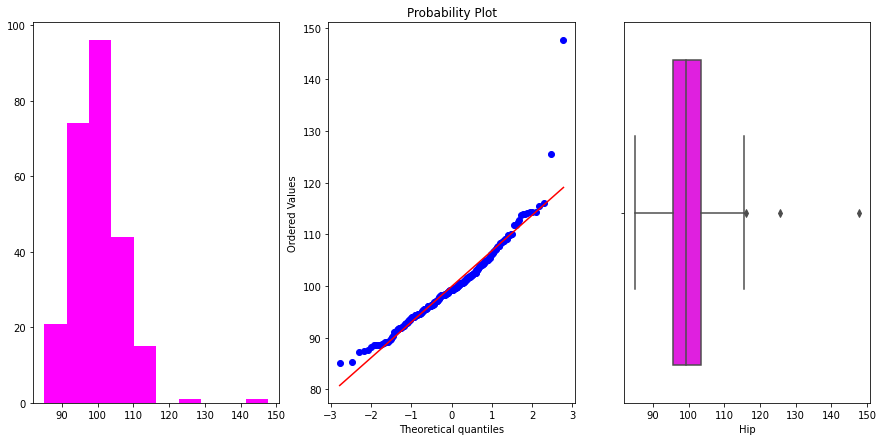

Distribution plots for the features Thigh as show:


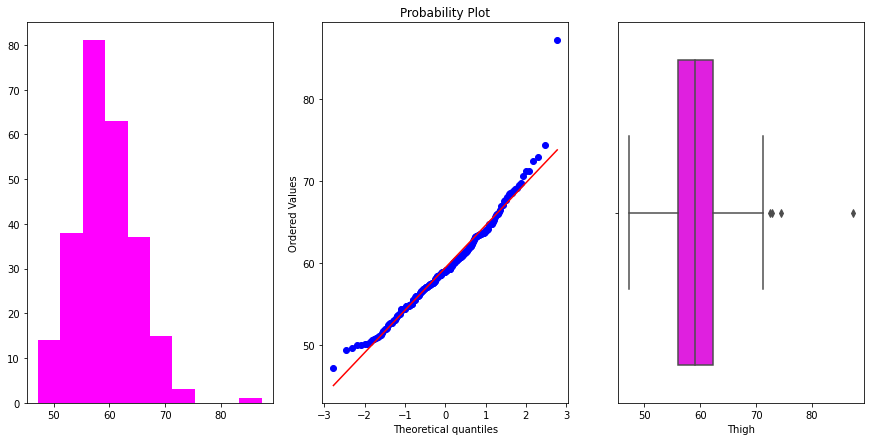

Distribution plots for the features Knee as show:


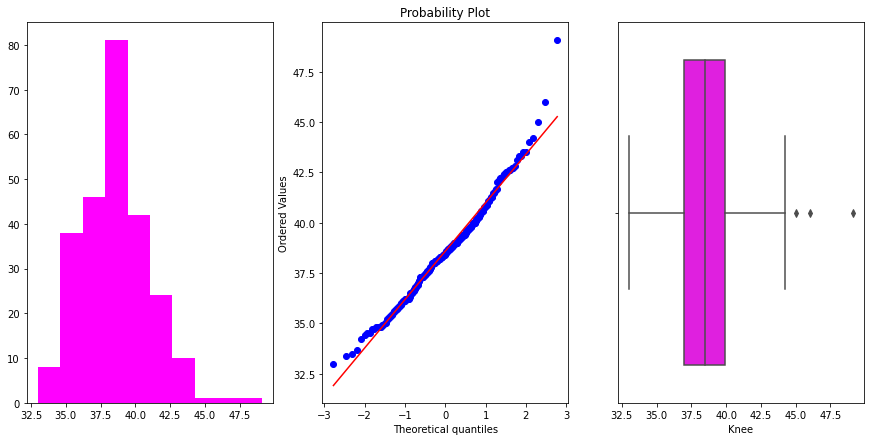

Distribution plots for the features Ankle as show:


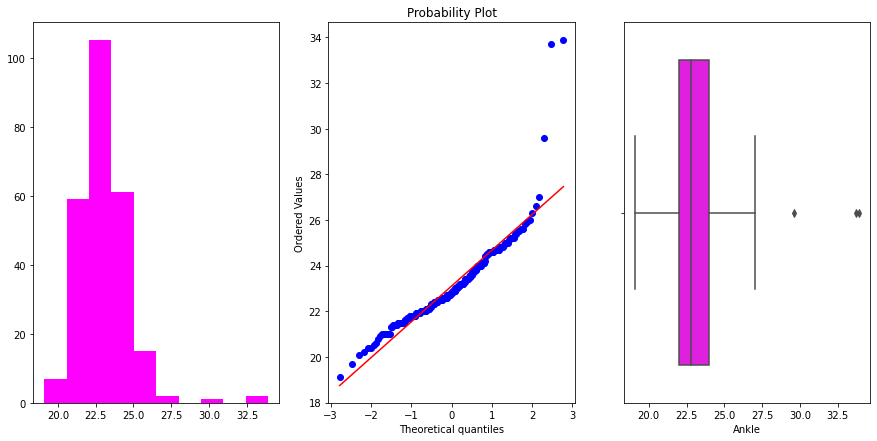

Distribution plots for the features Biceps as show:


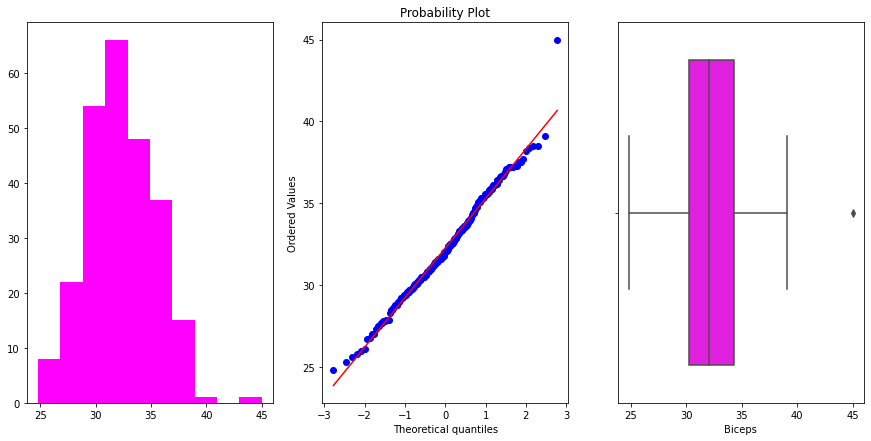

Distribution plots for the features Forearm as show:


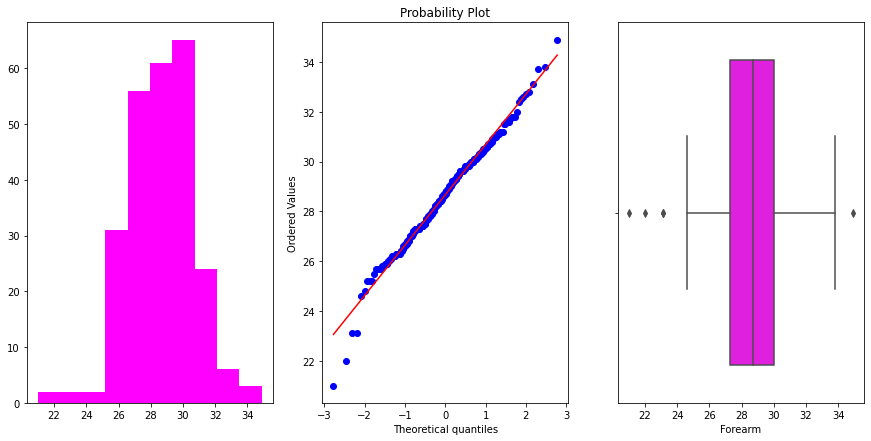

Distribution plots for the features Wrist as show:


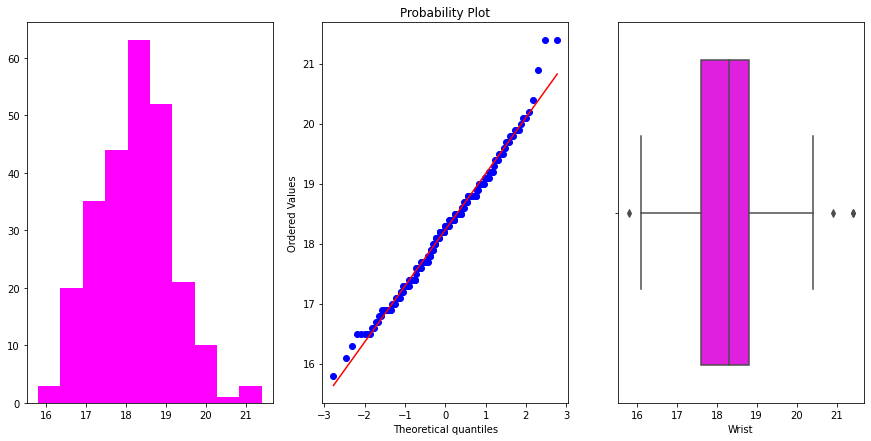

In [6]:
def drawplots(df, col):
    plt.figure(figsize=(15,7))
    plt.subplot(1,3,1) # row, columns, plot 1 is histogram
    plt.hist(df[col], color = 'magenta')
    
    plt.subplot(1,3,2) 
    stats.probplot(df[col],dist = 'norm',plot = plt)
    
    plt.subplot(1,3,3)
    sn.boxplot(df[col],color = 'magenta')
    
    plt.show()
    
cols = list(df.columns)
for i in range(len(cols)):
    print(f'Distribution plots for the features {cols[i]} as show:')
    
    drawplots(df,cols[i])
    
    print('='*100)
    
# if everything is normally distributed then you dont need to do any transformation, you should get good results in your model
# if some things were not normally distributed, then you would need to do some transformation

### Check for outliers

In [7]:
upperlimit = []
lowerlimit = []
for i in df.columns:
    upperlimit.append(df[i].mean()+(df[i].std())*4)
    lowerlimit.append(df[i].mean()-(df[i].std())*4)

In [8]:
cols = list(df.columns)
j=0
for i in range(len(cols)):
    temp = df.loc[(df[cols[i]]>upperlimit[j]) & (df[cols[i]]<lowerlimit[j])]
    j+=1

In [9]:
# no outliers
temp

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist


### Feature Selection

In [10]:
data = df.copy()
test = data['BodyFat']
train = data.drop(['BodyFat'], axis = 1)

In [11]:
from sklearn.ensemble import ExtraTreesRegressor

er = ExtraTreesRegressor()
er.fit(train, test)

ExtraTreesRegressor()

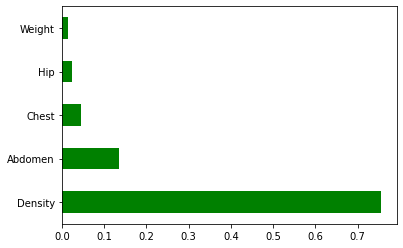

In [12]:
series = pd.Series(er.feature_importances_, index = train.columns)
series.nlargest(5).plot(kind = 'barh', color = 'green')

### Feature Selection using Mutal Information Gain

In [13]:
from sklearn.feature_selection import  mutual_info_regression
mr = mutual_info_regression(train, test)

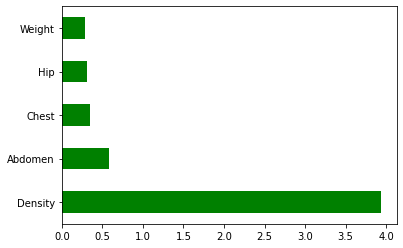

In [14]:
plotdata = pd.Series(mr, index = train.columns)
plotdata.nlargest(5).plot(kind = 'barh', color = 'green')

### Removing correlation

In [15]:
data

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


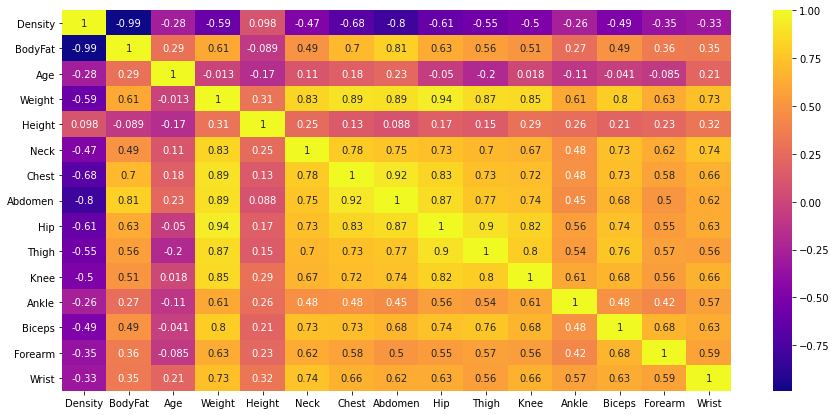

In [16]:
plt.figure(figsize=(15,7))
sn.heatmap(df.corr(), annot = True, cmap = 'plasma')

In [17]:
def correlation(df, threshold):
    colcor = set() # can use list instead of set() but set does not allow duplicates whereas list() does
    cormat = df.corr() # correlation matrix
    
    for i in range(len(cormat)):
        for j in range(i):
            """
            for each cell get the value of that cell by .iloc[i][j],
            where i is the row and j is the col if that abs(value) is greater
            than the threshold, get the col_name and add it in the set
            """
            
            if abs(cormat.iloc[i][j])>threshold:
                colname = cormat.columns[i]
                colcor.add(colname)
    return colcor

ans = correlation(train, threshold = 0.85)
ans
# Density was not included because it only has high correlation with the dependant variable (BodyFat). The df we passed does not have BodyFat

{'Abdomen', 'Chest', 'Hip', 'Knee', 'Thigh'}

In [18]:
# variance
# how much of the variance can be explained by the independent feature
# if the value is high, than the feature will be responsible for overfitting
# if it's low, then the feature is not important
# looking for variance between 70-80%

In [19]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
temp = data[list(data.columns)]
info = pd.DataFrame()
info['IVF'] = [variance_inflation_factor(temp.values, i) for i in range(temp.shape[1])]
info['Column'] = temp.columns
info.sort_values('IVF', ascending = False)
# density may be giving too much information and overfit it

,IVF,Column
0,3695.622377,Density
8,2933.636131,Hip
6,1374.457425,Chest
14,1349.973920,Wrist
7,1332.624257,Abdomen
3,1238.097164,Weight
10,1187.890413,Knee
5,1081.965633,Neck
9,1017.257501,Thigh
4,613.410514,Height


In [21]:
cols1 = list(series.nlargest(5).index)
cols2 = list(plotdata.nlargest(5).index)
cols1, cols2
# in the vide, cols2 has Thigh instead of Weight
# based on video, we will select only features in cols1

(['Density', 'Abdomen', 'Chest', 'Hip', 'Weight'],
 ['Density', 'Abdomen', 'Chest', 'Hip', 'Weight'])

In [22]:
# training data
totrain = train[cols1]
totrain.head()

,Density,Abdomen,Chest,Hip,Weight
0,1.0708,85.2,93.1,94.5,154.25
1,1.0853,83.0,93.6,98.7,173.25
2,1.0414,87.9,95.8,99.2,154.00
3,1.0751,86.4,101.8,101.2,184.75
4,1.0340,100.0,97.3,101.9,184.25


### Model building

In [23]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [24]:
X_train, X_test, y_train, y_test = train_test_split(totrain, test, test_size = 0.2)
X_train.shape, X_test.shape

((201, 5), (51, 5))

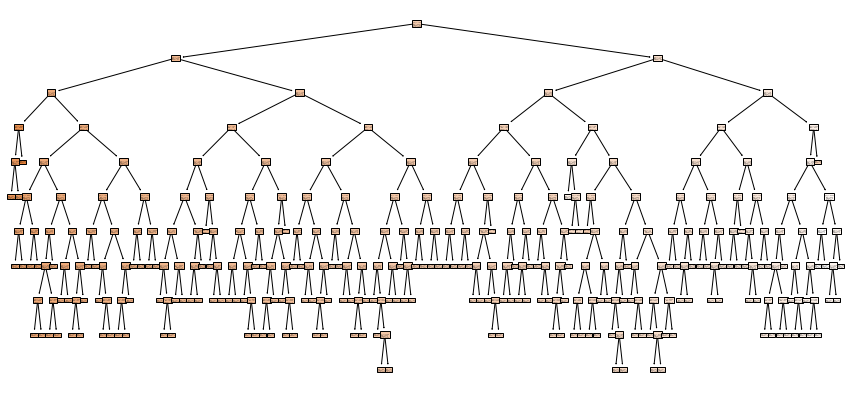

In [25]:
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)
plt.figure(figsize = (15,7))
tree.plot_tree(reg, filled = True)
plt.show()

In [26]:
# prunning the tree
# the tree is large, so we will prune it
path = reg.cost_complexity_pruning_path(X_train, y_train)
ccp_alpha = path.ccp_alphas

In [27]:
ccp_alpha[:10]

array([0.00000000e+00, 1.41401539e-16, 2.82803079e-16, 8.48409237e-16,
       1.13121232e-15, 1.13121232e-15, 3.39363695e-15, 6.78727389e-15,
       1.86567164e-05, 2.48756219e-05])

In [28]:
alphalist = []
for i in range(len(ccp_alpha)):
    reg = DecisionTreeRegressor(ccp_alpha = ccp_alpha[i])
    reg.fit(X_train, y_train)
    alphalist.append(reg)

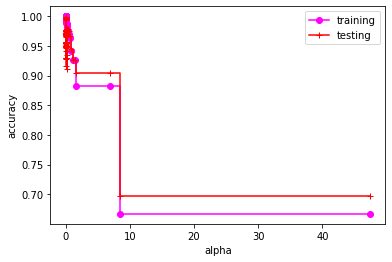

In [29]:
trainscore = [alphalist[i].score(X_train, y_train) for i in range(len(alphalist))]

testscore = [alphalist[i].score(X_test, y_test) for i in range(len(alphalist))]

plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.plot(ccp_alpha, trainscore, marker = 'o', label = 'training', color = 'magenta', drawstyle = 'steps-post')
plt.plot(ccp_alpha, testscore, marker = '+', label = 'testing', color = 'red', drawstyle = 'steps-post')
plt.legend()
plt.show()

After alpha value 1 there is a suddend drop in accuracy

In [30]:
## normal approach

clf = DecisionTreeRegressor(ccp_alpha = 1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f'Decision Tree Normal Approach: {metrics.r2_score(y_test, y_pred)}')

rf = RandomForestRegressor(n_estimators = 1000, ccp_alpha = 1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(f'Random Forest Normal approach: {metrics.r2_score(y_test, y_pred_rf)}')

Decision Tree Normal Approach: 0.9443195729822742
Random Forest Normal approach: 0.978675709674677


### Hyperparameter Tuning

In [31]:
params = {
    'RandomForest':{
        'model':RandomForestRegressor(),
        'params':{
            'n_estimators':[int(x) for x in np.linspace(start=1, stop = 1200, num = 10)],
            'criterion':['mse','mae'],
            'max_depth':[int(x) for x in np.linspace(start = 1, stop = 30, num = 5)],
            'min_samples_split':[2,5,10,12],
            'min_samples_leaf':[2,5,10,12],
            'ccp_alpha':[1,2,2.5,3,3.5,4,5]
        }
    },
    'D-tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'criterion':['mse','mae'],
            'splitter':['best','random'],
            'min_samples_split':[1,2,4,10,12],
            'min_samples_leaf':[1,2,5,10,12],
            'max_features':['auto','sqrt'],
            'ccp_alpha':[1,2,2.5,3,3.5,4,5]
        }
    },
    'SVM':{
        'model':SVR(),
        'params':{
            'C':[0.25,0.50,0.75,1.0],
            'tol':[1e-10,1e-5,1e-4,0.025,0.5, 0.75],
            'kernel':['linear','poly','rbf','sigmoid'],
            'max_iter':[int(x) for x in np.linspace(start = 1, stop = 250, num = 10)]
        }
    }
}

In [32]:
scores = []
for modelname, mp in params.items():
    clf = RandomizedSearchCV(mp['model'], param_distributions = mp['params'],
                            cv = 5, n_jobs = -1, n_iter = 10, scoring = 'neg_mean_squared_error')
    clf.fit(X_train, y_train)
    scores.append({
        'model':modelname,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_
    })

In [33]:
scores

[{'model': 'RandomForest',
  'best_score': -6.195341948765196,
  'best_estimator': RandomForestRegressor(ccp_alpha=3, max_depth=22, min_samples_leaf=2,
                        n_estimators=933)},
 {'model': 'D-tree',
  'best_score': -16.40871026517132,
  'best_estimator': DecisionTreeRegressor(ccp_alpha=5, max_features='sqrt', min_samples_leaf=2,
                        min_samples_split=12)},
 {'model': 'SVM',
  'best_score': -46.26709048411648,
  'best_estimator': SVR(C=0.75, max_iter=250, tol=0.5)}]

In [36]:
scoresdf = pd.DataFrame(scores, columns = ['model','best_score','best_estimator'])
scoresdf

,model,best_score,best_estimator
0,RandomForest,-6.195342,"(DecisionTreeRegressor(ccp_alpha=3, max_depth=..."
1,D-tree,-16.408710,"DecisionTreeRegressor(ccp_alpha=5, max_feature..."
2,SVM,-46.267090,"SVR(C=0.75, max_iter=250, tol=0.5)"


Random Forest is giving the best score, SVM is giving the worst score
Above we used CV to check which model gives the best score. Now that we've determined it's RF, we will run the whole of training set with RF and see what score we get

In [37]:
scores[0]['best_estimator']

RandomForestRegressor(ccp_alpha=3, max_depth=22, min_samples_leaf=2,
                      n_estimators=933)

In [38]:
rf = scores[0]['best_estimator']
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(metrics.r2_score(y_test, y_pred))

0.9492089083832801


We can see that we get a very good score with RF, so now we will run the whole trining data on RF.  
Do we have another test set?  
`totrain` was used above to create `X_train, X_test`

In [43]:
# this is an interesting way to get the results
totrainlist = np.array(totrain)
predicted = []
for i in range(len(totrainlist)):
    predicted.append(rf.predict([totrainlist[i]]))
    
totrain['Actual Result'] = test
totrain['Predicted Result'] = np.array(predicted)
totrain

,Density,Abdomen,Chest,Hip,Weight,Actual Result,Predicted Result
0,1.0708,85.2,93.1,94.5,154.25,12.3,12.662920
1,1.0853,83.0,93.6,98.7,173.25,6.1,8.235301
2,1.0414,87.9,95.8,99.2,154.00,25.3,23.430333
3,1.0751,86.4,101.8,101.2,184.75,10.4,8.468581
4,1.0340,100.0,97.3,101.9,184.25,28.7,31.113410
...,...,...,...,...,...,...,...
247,1.0736,83.6,89.2,88.8,134.25,11.0,9.153103
248,1.0236,105.0,108.5,104.5,201.00,33.6,31.910423
249,1.0328,111.5,111.1,101.7,186.75,29.3,31.426405
250,1.0399,101.3,108.3,97.8,190.75,26.0,23.778797


[]

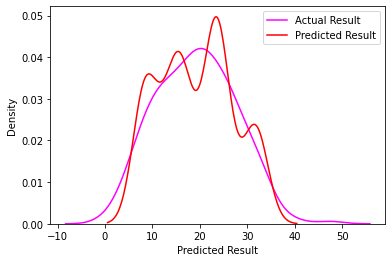

In [47]:
sn.distplot(totrain['Actual Result'], label = 'Actual Result', hist = False, color = 'magenta')
sn.distplot(totrain['Predicted Result'], label = 'Predicted Result', hist = False, color = 'red')
plt.legend()
plt.plot()

You need to run a grid search to find the best parameters

In [49]:
# saving the model

import pickle
file = open('bodyfatmodel1.pkl', 'wb')
pickle.dump(rf, file)
file.close()